## Challenge 4

In [2]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import math
import pandas as pd
import itertools
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [3]:
data = pd.read_csv('test_restaurant.csv', header=0, index_col=0) # loading the data

In [5]:
data.any() is None #checking for none values

False

In [6]:
data.any()<0 # checking for negative values

num_visitors    False
dtype: bool

In [4]:
data.plot(figsize=(15, 6))
plt.title("Observed Data")#plotting the data
plt.show()

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8 #visualizing data using time-series decomposition that allows us to decompose time series into three distinct components: trend, seasonality, and noise.
decomposition = sm.tsa.seasonal_decompose(data, model='additive',period = 365)
fig = decomposition.plot()
plt.show()

In [12]:
def difference_transform(data):#creating a difference transformed data
    d = []
    for i in range(1, len(data)):
        d.append(data[i] - data[i - 1])
    return np.asarray(d)
trans_data = difference_transform(data['num_visitors'])

In [13]:
split = int(len(trans_data)*.70)#splitting the dataset
train,test =  trans_data[0:split], trans_data[split:]

Test RMSE: 4.957


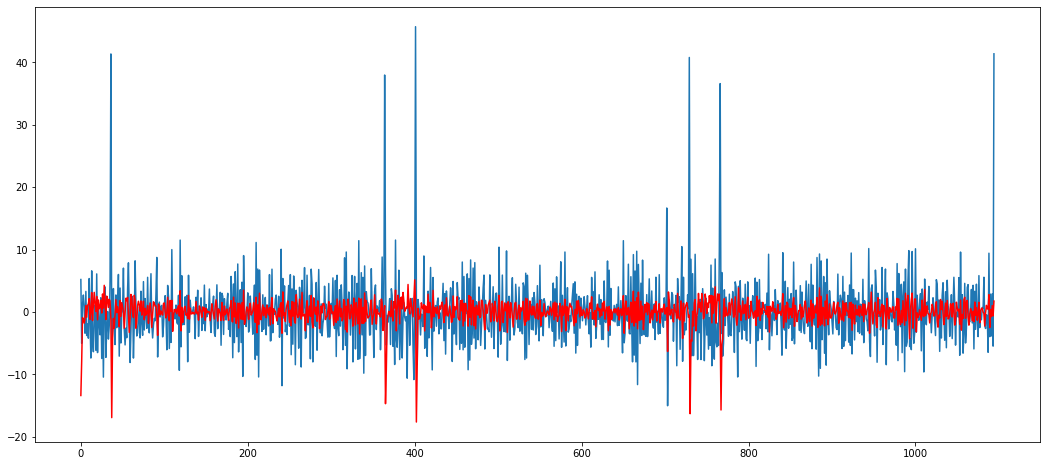

In [14]:
model = AutoReg(train, lags=6)#creating a auto regression model with lag =6
model_fit = model.fit()
coef = model_fit.params

def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
history = [train[i] for i in range(len(train))]
predictions = []
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = math.sqrt(mean_squared_error(test, predictions))#estimating root meean square error of our prediction
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [25]:
lag = trans_data[-6:]
prediction = predict(coef, lag)
yhat = prediction + data['num_visitors'][-1]
print('Prediction: ', yhat)

Prediction:  50.66243479706151


Given the limited time span I could only implement one model.